In [ ]:
#before you run the program make sure you have downloaded all the required images (folder name: new) and
#then change the path of the image files mentioned in certain cells below.
#also if you are using jupyter notebook to execute then make sure to run all the cells together to get final output, don't just run the last cell.

In [6]:
#import libraries
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [7]:
'''pip install mediapipe --user'''

'pip install mediapipe --user'

In [8]:
#initializing mediapose as pose class
mp_pose = mp.solutions.pose
#setting up pose function
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

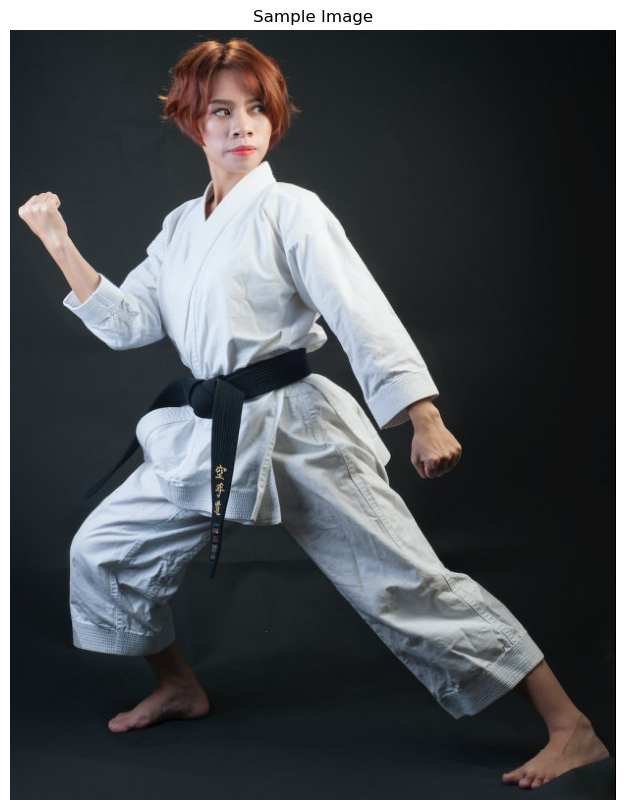

In [9]:
#read a sample image
sample_img = cv2.imread(r"C:\Users\afree\Desktop\POSE\new\sample.jpg")
plt.figure(figsize = [10, 10])
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [10]:
#first convert image to rgb format then perform pose detection
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
#check if any landmarks are found
if results.pose_landmarks:
    for i in range(2):
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.3771182
y: 0.127552718
z: -0.675201237
visibility: 0.999999762

LEFT_EYE_INNER:
x: 0.392553866
y: 0.10541141
z: -0.637000382
visibility: 0.999999642



C:\Users\afree\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [11]:
image_height, image_width, _ = sample_img.shape
if results.pose_landmarks:
    for i in range(2):
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 232.68192943930626
y: 100.00133085250854
z: -416.59916335344315
visibility: 0.9999997615814209

LEFT_EYE_INNER:
x: 242.20573526620865
y: 82.64254570007324
z: -393.0292356610298
visibility: 0.9999996423721313



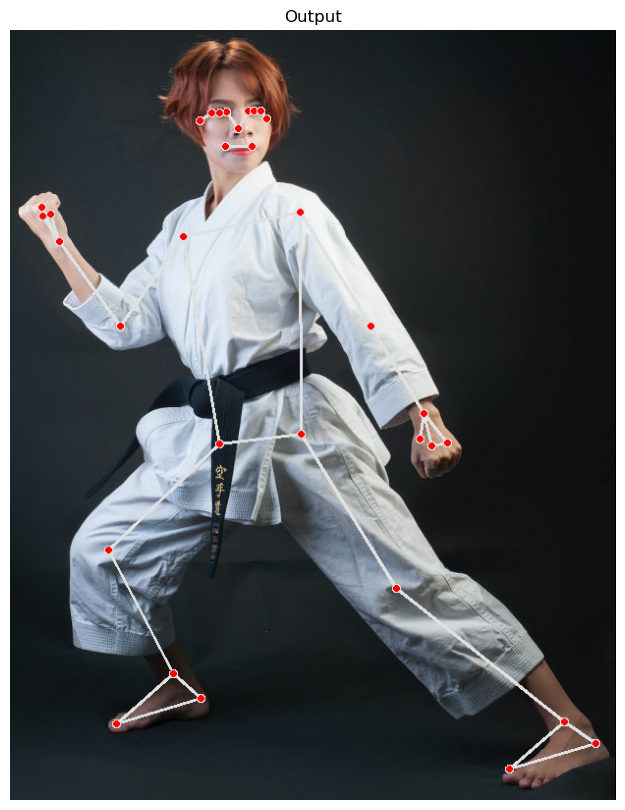

In [12]:
#create image copy to draw landmarks(those tiny dots)
img_copy = sample_img.copy()
#if any landmarks are found
if results.pose_landmarks:
    #draw landmarks on the sample image
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    #figure size
    fig = plt.figure(figsize = [10, 10])
    #display the output image with landmarks drawn on it and also convert it from BGR to RGB
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

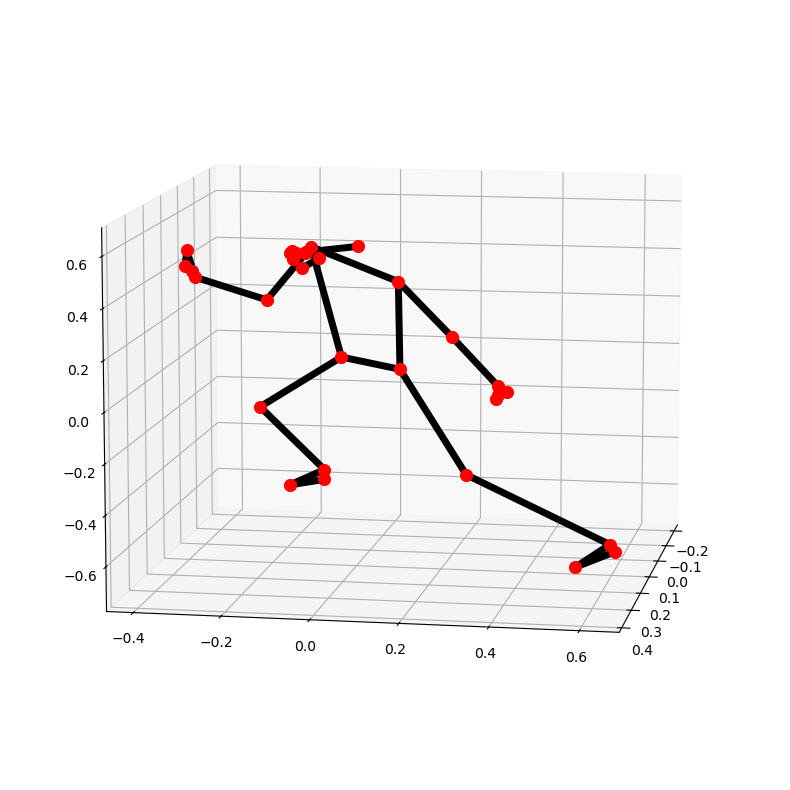

In [13]:
#estimating in 3d #plot pose detection in 3d
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [14]:
#creating pose detection function
def detectPose(image, pose, display=True):
     #create copy of input image
    output_image = image.copy()
    #BGR TO RGB
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #perform pose detection
    results = pose.process(imageRGB)
    #get height and width of input image
    height, width, _ = image.shape
    #list to store the detected landmarks
    landmarks = []

    #check if any landmarks are found
    if results.pose_landmarks:
        #draw pose landmarks on output image
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x * width), int(landmark.y * height), (landmark.z * width)))
    if display:
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    else:
        return output_image, landmarks
        

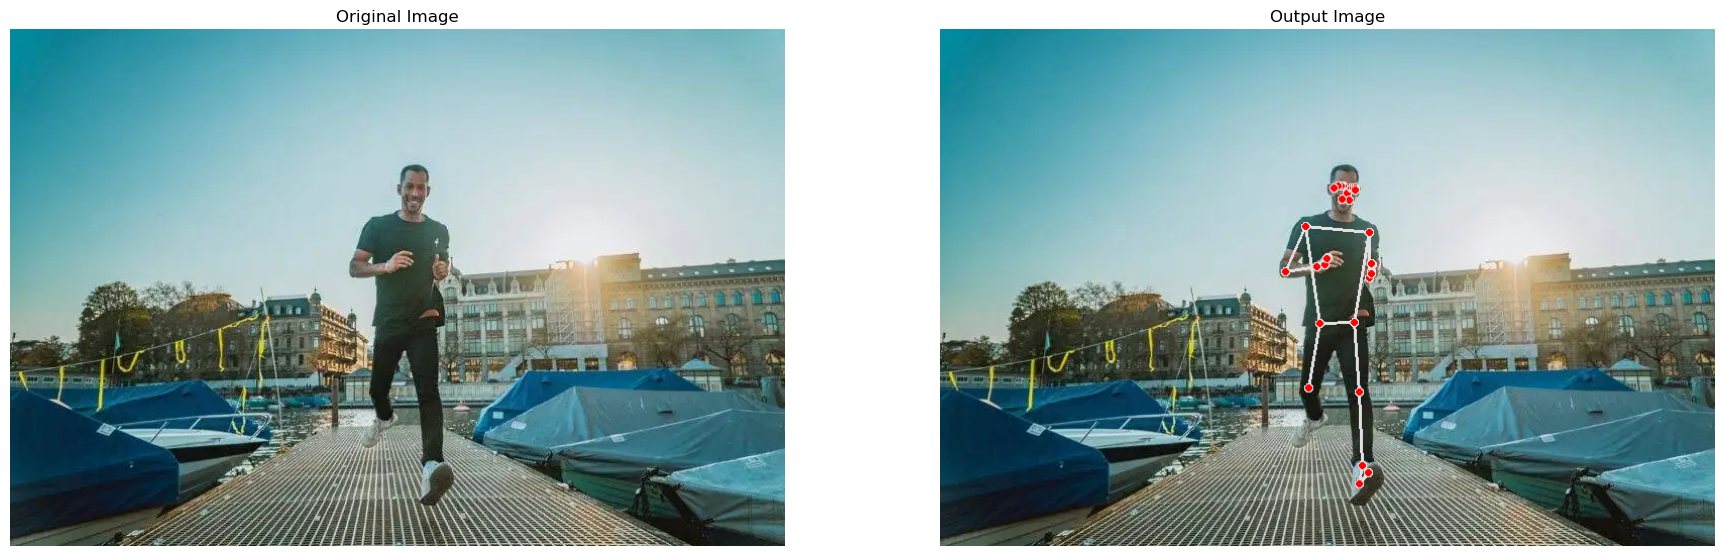

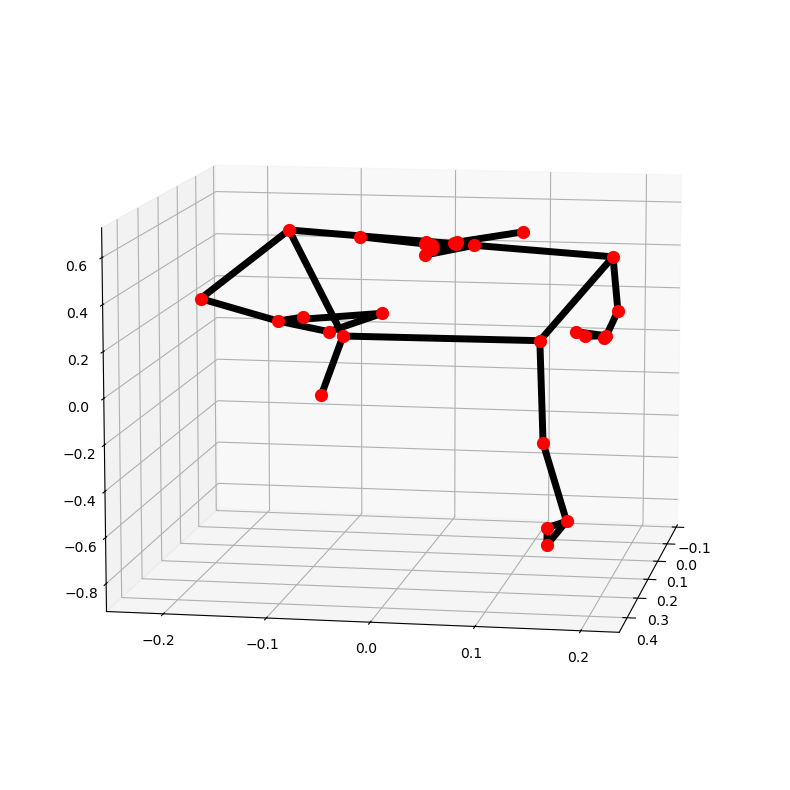

In [15]:
#read a sample image and perform pose detection
image = cv2.imread(r"C:\Users\afree\Desktop\POSE\new\sample1.jpg")
detectPose(image, pose, display=True)

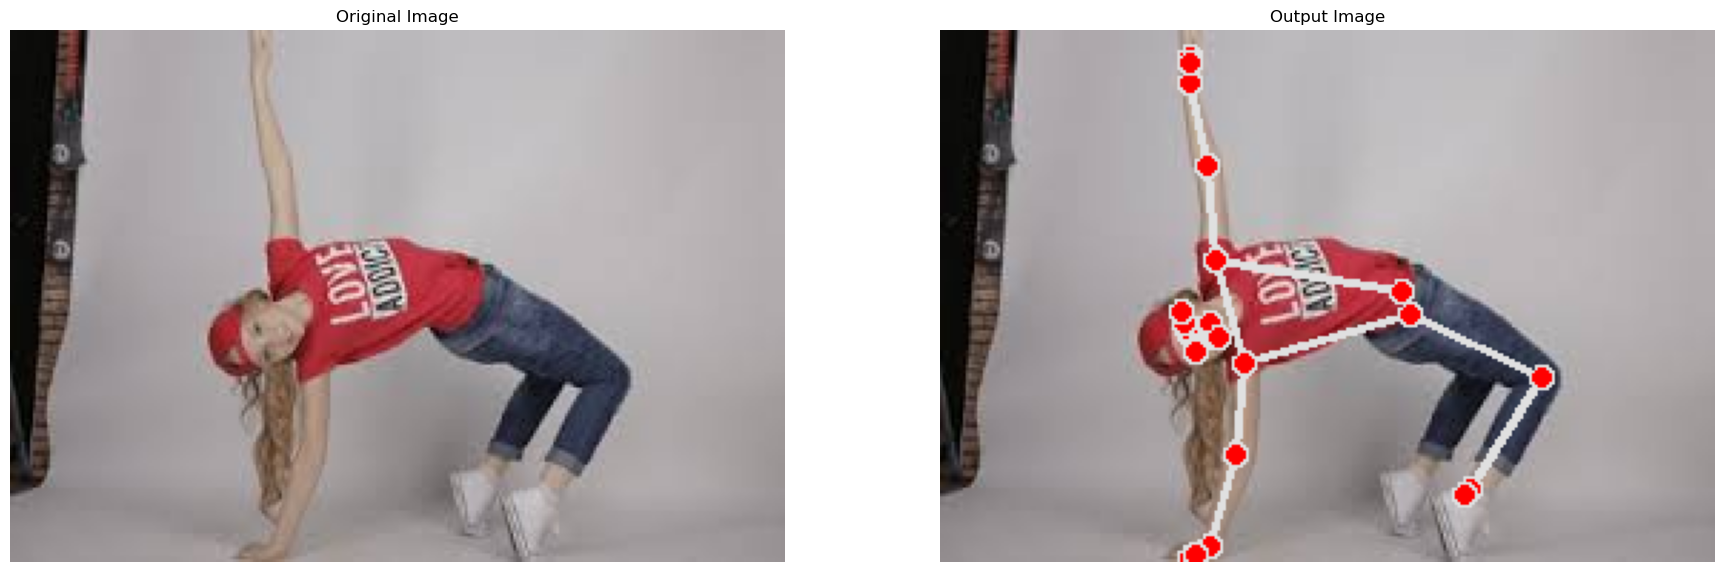

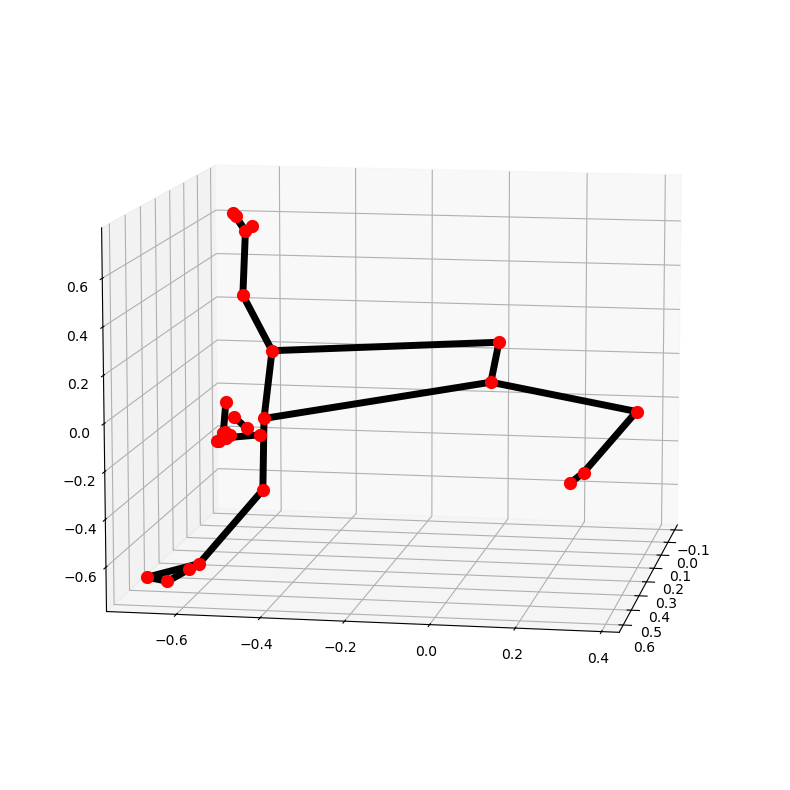

In [16]:
#read another sample image and perform pose detection
image = cv2.imread(r"C:\Users\afree\Desktop\POSE\new\sample2.jpg")
detectPose(image, pose, display=True)

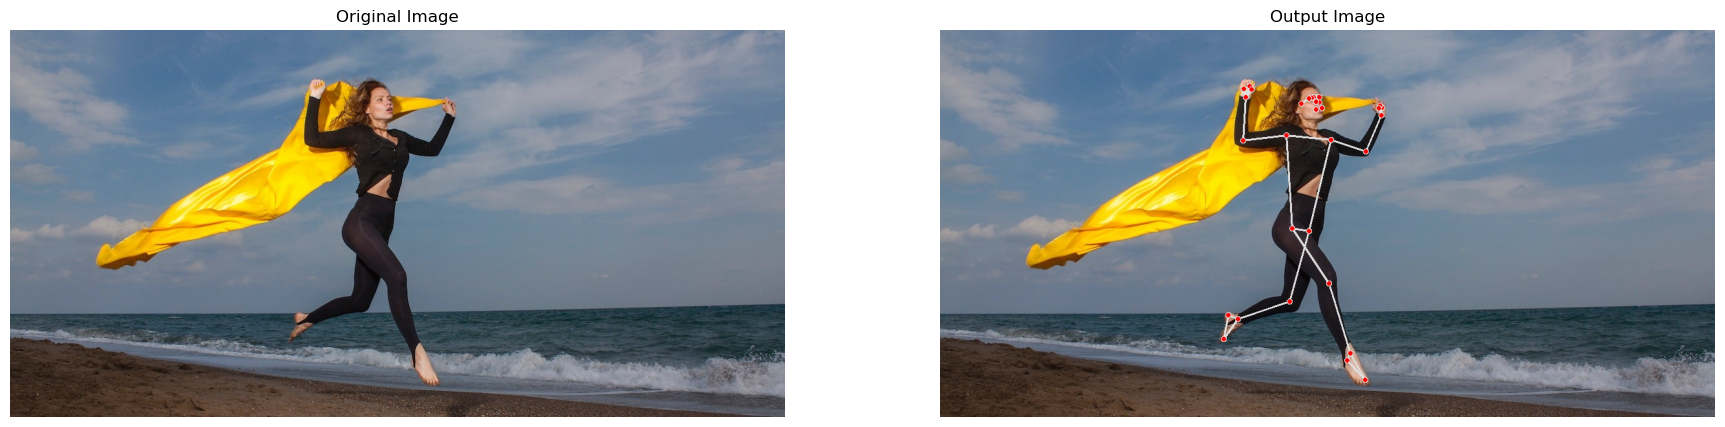

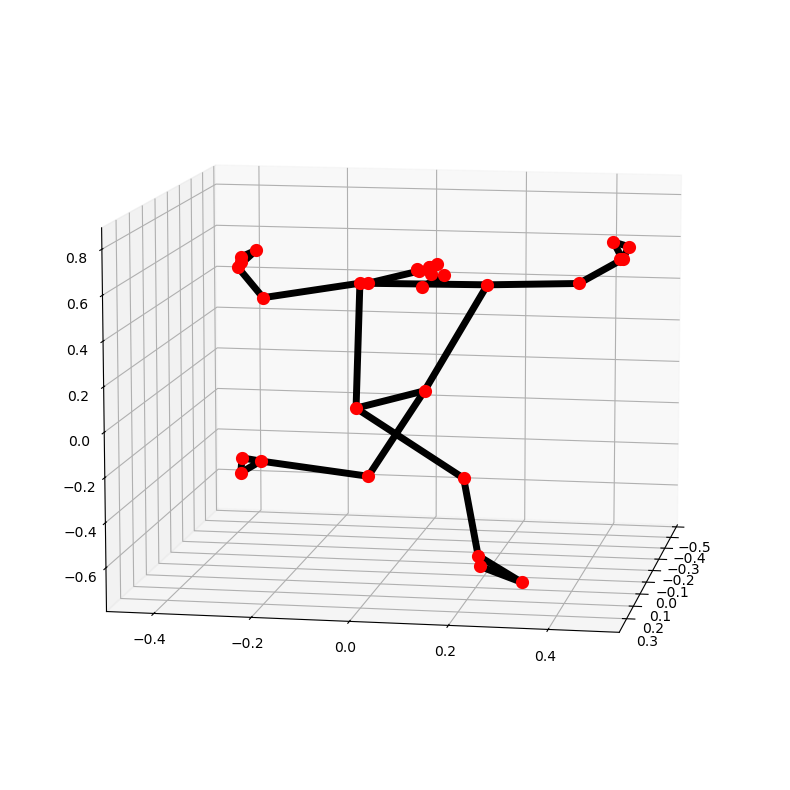

In [17]:
#read another sample image and perform pose detection
image = cv2.imread(r"C:\Users\afree\Desktop\POSE\new\sample3.jpg")
detectPose(image, pose, display=True)

In [18]:
#code to open webcam and get real time image/video for pose detection
#keep this code as comment, dont change
'''pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5,model_complexity=1)

video = cv2.VideoCapture(0)
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)

video.set(3,1280)
video.set(4,960)

time1 = 0

while video.isOpened():
    ok, frame = video.read()
    if not ok:
        break
    
    frame = cv2.flip(frame, 1)
    frame_height, frame_width, _ = frame.shape
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)),640))
    frame, _ = detectPose(frame, pose_video, display=False)
    time2 = time()
    
    if (time1 - time1) > 0:
        frames_per_second = 1.0 / (time2 - time1)
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)),(10,30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    time1 = time2
    cv2.imshow('Pose Detection', frame)
    k = cv2.waitKey(1) & 0xFF
    if(k ==27):
        break

video.release()
cv2.destroyAllWindows()'''

"pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5,model_complexity=1)\n\nvideo = cv2.VideoCapture(0)\ncv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)\n\nvideo.set(3,1280)\nvideo.set(4,960)\n\ntime1 = 0\n\nwhile video.isOpened():\n    ok, frame = video.read()\n    if not ok:\n        break\n    \n    frame = cv2.flip(frame, 1)\n    frame_height, frame_width, _ = frame.shape\n    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)),640))\n    frame, _ = detectPose(frame, pose_video, display=False)\n    time2 = time()\n    \n    if (time1 - time1) > 0:\n        frames_per_second = 1.0 / (time2 - time1)\n        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)),(10,30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)\n    time1 = time2\n    cv2.imshow('Pose Detection', frame)\n    k = cv2.waitKey(1) & 0xFF\n    if(k ==27):\n        break\n\nvideo.release()\ncv2.destroyAllWindows()"

In [19]:
'''cap = cv2.VideoCapture(0)
while cap.isOpened():
    # read frame
    _, frame = cap.read()
    try:
        # resize the frame for portrait video
        # frame = cv2.resize(frame, (350, 600))
        # convert to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # process the frame for pose detection
        pose_results = pose.process(frame_rgb)
        # print(pose_results.pose_landmarks)
        
        # draw skeleton on the frame
        mp_drawing.draw_landmarks(frame, pose_results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        # display the frame
        cv2.imshow('Output', frame)
    except:
        break
        
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 
'''


"cap = cv2.VideoCapture(0)\nwhile cap.isOpened():\n    # read frame\n    _, frame = cap.read()\n    try:\n        # resize the frame for portrait video\n        # frame = cv2.resize(frame, (350, 600))\n        # convert to RGB\n        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)\n        \n        # process the frame for pose detection\n        pose_results = pose.process(frame_rgb)\n        # print(pose_results.pose_landmarks)\n        \n        # draw skeleton on the frame\n        mp_drawing.draw_landmarks(frame, pose_results.pose_landmarks, mp_pose.POSE_CONNECTIONS)\n        # display the frame\n        cv2.imshow('Output', frame)\n    except:\n        break\n        \n    if cv2.waitKey(1) == ord('q'):\n        break\ncap.release()\ncv2.destroyAllWindows() \n"

In [20]:
import math
def calculateAngle(landmark1, landmark2, landmark3):

    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    if angle < 0:
        angle += 360
    return angle

In [21]:
#just an example
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [22]:
#classifying poses
#classifying poses by calulating various angles
#angle between any three landmark points drawn on the image 
#total 3 poses: warrior II pose, T pose, Tree pose
'''because we are using hueristics the more poses we add, the more complex the problem becomes, we need to fugure out multiple angles 
between various landmark points and in order to that we need to use multilayer perceptron, so we are just sticking to three poses for now.'''

def classifyPose(landmarks, output_image, display=False):
    label = 'Unknown Pose'
    color = (0, 0, 255)
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value], 
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value], 
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value], 
                                      landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value], 
                                      landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value], 
                                      landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value], 
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
           if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
            if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
                label = 'warrior II pose'
        if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
            label = 'T Pose'
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
        if left_knee_angle > 315 and left_knee-angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:
            label = 'Tree Pose' 
    if label != 'Unknown Pose':
        color = (0, 255, 0)
    cv2.putText(output_image, label, (10,30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    if display:
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    else:
        return output_image, label

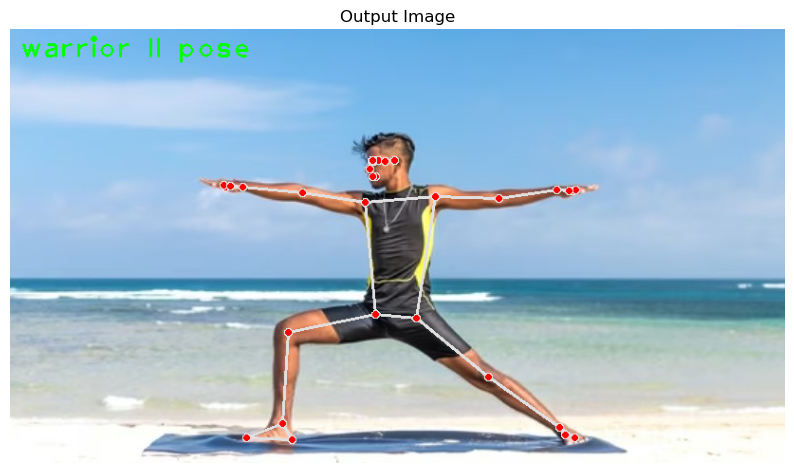

In [23]:
#read a sample image and perform classification on it

import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\afree\Desktop\POSE\new\warriorIIpose.jpg")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

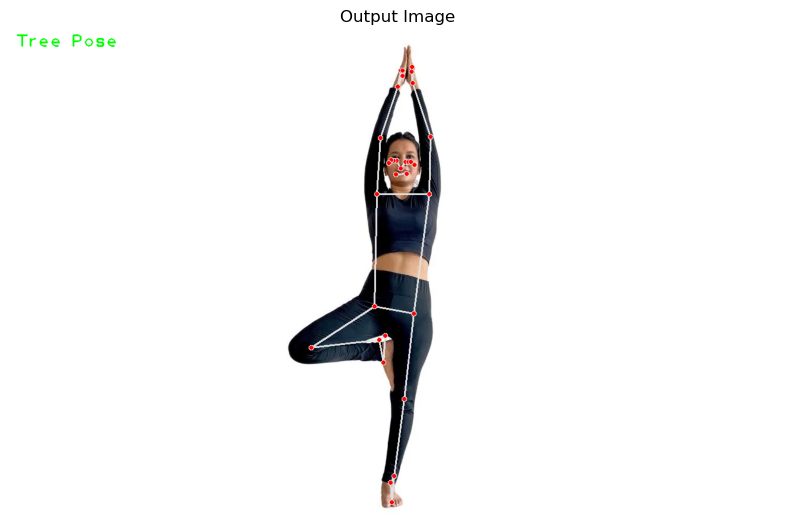

In [25]:
#read sample for tree pose
image = cv2.imread(r"C:\Users\afree\Desktop\POSE\new\treepose3.jpg")
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True,
                                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

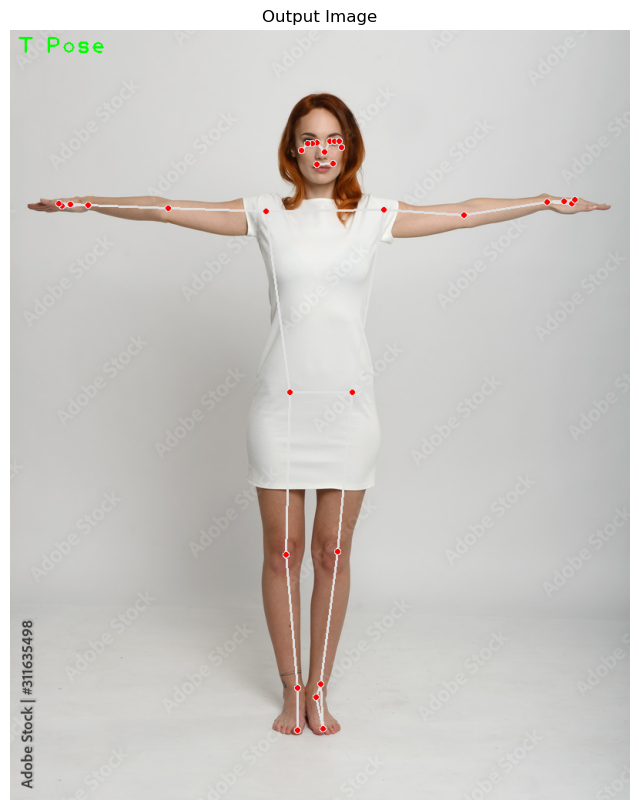

In [26]:
#read a sample to detect T pose
image = cv2.imread(r"C:\Users\afree\Desktop\POSE\new\tpose.jpg")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

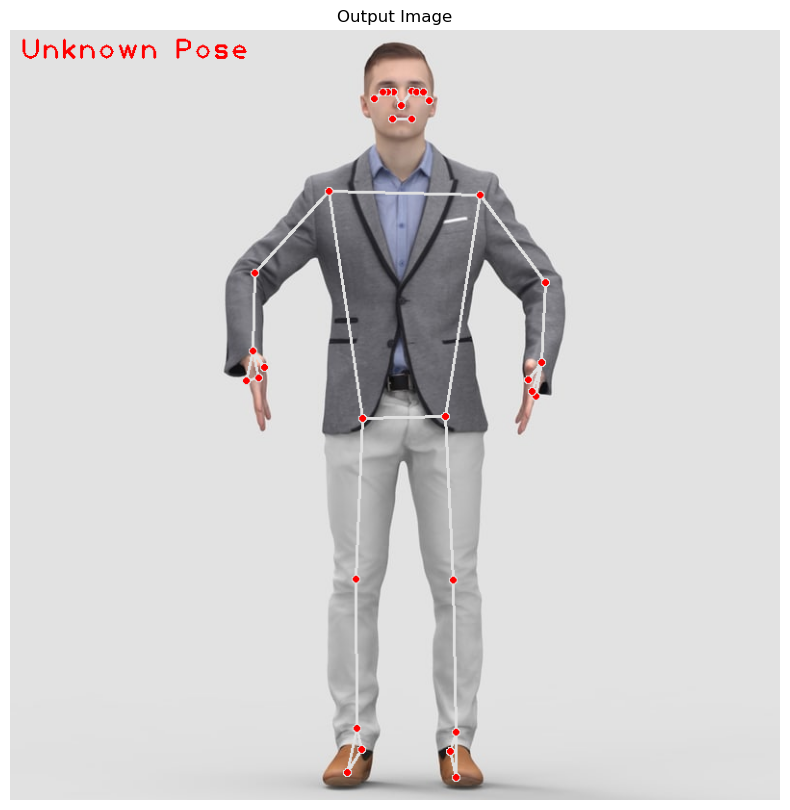

In [27]:
#read a sample to detect unknown pose
image = cv2.imread(r"C:\Users\afree\Desktop\POSE\new\unknown.jpg")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [5]:
#IDENTIFIES THE POSE IN REAL TIME THROUGH WEB CAM
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5,model_complexity=1)

camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

cv2.namedWindow('Pose Classification' , cv2.WINDOW_NORMAL)
while camera_video.isOpened():
    ok, frame = camera_video.read()
    if not ok:
        continue
    frame = cv2.flip(frame,1)
    frame_height, frame_width, _= frame.shape
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    frame, landmarks = detectPose(frame, pose_video, display=False)
    if landmarks:
        frame, _=classifyPose(landmarks, frame, display=False)
    cv2.imshow('Pose Classification',frame)
    k = cv2.waitKey(1) & 0xFF
    if (k == 27):
        break

camera_video.release()
cv2.destroyAllWindows()

"pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5,model_complexity=1)\n\ncamera_video = cv2.VideoCapture(0)\ncamera_video.set(3,1280)\ncamera_video.set(4,960)\n\ncv2.namedWindow('Pose Classification' , cv2.WINDOW_NORMAL)\nwhile camera_video.isOpened():\n    ok, frame = camera_video.read()\n    if not ok:\n        continue\n    frame = cv2.flip(frame,1)\n    frame_height, frame_width, _= frame.shape\n    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))\n    frame, landmarks = detectPose(frame, pose_video, display=False)\n    if landmarks:\n        frame, _=classifyPose(landmarks, frame, display=False)\n    cv2.imshow('Pose Classification',frame)\n    k = cv2.waitKey(1) & 0xFF\n    if (k == 27):\n        break\n\ncamera_video.release()\ncv2.destroyAllWindows()"